## 딥러닝 모델 평가

In [1]:
colab = 1

In [2]:
if colab:
  from google.colab import drive
  drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
if colab:
  !ln -s /content/drive/MyDrive/lab-bm/ch1/2.cnn-visualization lab
  %ls -l

total 8
drwx------ 5 root root 4096 Mar 27 03:15 drive/
lrwxrwxrwx 1 root root   53 Mar 27 03:15 lab -> /content/drive/MyDrive/lab-bm/ch1/2.cnn-visualization/
drwxr-xr-x 1 root root 4096 Mar 23 14:22 sample_data/


In [5]:
if colab:
  !cp lab/cats_dogs_tlearn_finetune_img_aug_cnn.h5 .
  !cp lab/my_cat.jpg .
  !cp lab/my_cat-2.jpg . 
  %ls

cats_dogs_tlearn_finetune_img_aug_cnn.h5  lab@          my_cat.jpg
drive/                                    my_cat-2.jpg  sample_data/


In [6]:
%matplotlib inline
if colab:
    %tensorflow_version 1.x

TensorFlow 1.x selected.


In [7]:
if colab:
  !pip install h5py==2.10.0

     |████████████████████████████████| 2.9 MB 2.9 MB/s 
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0


In [8]:
colab = 1
%ls

cats_dogs_tlearn_finetune_img_aug_cnn.h5  lab@          my_cat.jpg
drive/                                    my_cat-2.jpg  sample_data/


In [9]:
from tensorflow.keras.models import load_model

tl_img_aug_finetune_cnn = load_model('cats_dogs_tlearn_finetune_img_aug_cnn.h5')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [10]:
print(type(tl_img_aug_finetune_cnn))
tl_img_aug_finetune_cnn.summary()

<class 'tensorflow.python.keras.engine.sequential.Sequential'>
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_2 (Model)              (None, 8192)              14714688  
_________________________________________________________________
dense_18 (Dense)             (None, 512)               4194816   
_________________________________________________________________
dropout_14 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_15 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 513       
Total params: 19,172,673
Trainable params: 17,437,185
Non

In [11]:
tl_img_aug_finetune_cnn.layers

In [12]:
print(type(tl_img_aug_finetune_cnn.layers), len(tl_img_aug_finetune_cnn.layers))
print(type(tl_img_aug_finetune_cnn.layers[0]), type(tl_img_aug_finetune_cnn.layers[0].layers), len(tl_img_aug_finetune_cnn.layers[0].layers))

<class 'list'> 6
<class 'tensorflow.python.keras.engine.training.Model'> <class 'list'> 20


In [13]:
tl_img_aug_finetune_cnn.layers[0].summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0   

In [14]:
tl_img_aug_finetune_cnn.layers[0].layers

In [15]:
print(tl_img_aug_finetune_cnn.layers[0].layers[1])
print(tl_img_aug_finetune_cnn.layers[0].layers[1].name)
print(tl_img_aug_finetune_cnn.layers[0].layers[1].input)
print(tl_img_aug_finetune_cnn.layers[0].layers[1].input.name)
print(tl_img_aug_finetune_cnn.layers[0].layers[1].output)
print(tl_img_aug_finetune_cnn.layers[0].layers[1].output.name)
print(tl_img_aug_finetune_cnn.layers[0].layers[2].output)

block1_conv1
Tensor("input_5:0", shape=(?, 150, 150, 3), dtype=float32)
input_5:0
Tensor("block1_conv1/Relu:0", shape=(?, 150, 150, 64), dtype=float32)
block1_conv1/Relu:0
Tensor("block1_conv2/Relu:0", shape=(?, 150, 150, 64), dtype=float32)


In [16]:
tl_img_aug_finetune_cnn.layers[0].layers[1:9]

In [17]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array, array_to_img

IMG_DIM = (150, 150)
sample_img_path = 'my_cat-2.jpg'
sample_img = load_img(sample_img_path, target_size=IMG_DIM)
sample_img_tensor = img_to_array(sample_img)
sample_img_tensor = np.expand_dims(sample_img_tensor, axis=0)
sample_img_tensor /= 255.

print(sample_img_tensor.shape)

(1, 150, 150, 3)


In [18]:
# Extracts the outputs of the top 8 layers:
layer_outputs = [layer.output for layer in tl_img_aug_finetune_cnn.layers[0].layers[1:9]]

print(len(layer_outputs))
print(layer_outputs[:3])

8
[<tf.Tensor 'block1_conv1/Relu:0' shape=(?, 150, 150, 64) dtype=float32>, <tf.Tensor 'block1_conv2/Relu:0' shape=(?, 150, 150, 64) dtype=float32>, <tf.Tensor 'block1_pool/MaxPool:0' shape=(?, 75, 75, 64) dtype=float32>]


In [19]:
from tensorflow.keras import models

# Creates a model that will return these outputs, given the model input:
activation_model = models.Model(inputs=tl_img_aug_finetune_cnn.layers[0].layers[1].input, outputs=layer_outputs)

print(type(activation_model))
activation_model.summary()

<class 'tensorflow.python.keras.engine.training.Model'>
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block

In [20]:
# This will return a list of 8 Numpy array
# one array per layer activation
activations = activation_model.predict(sample_img_tensor)

print(type(activations), len(activations), type(activations[0]), activations[0].shape)

<class 'list'> 8 <class 'numpy.ndarray'> (1, 150, 150, 64)


In [21]:
print ('Sample layer shape:', activations[0].shape)
print('Sample convolution (activation map) shape:', activations[0][0, :, :, 1].shape)

Sample layer shape: (1, 150, 150, 64)
Sample convolution (activation map) shape: (150, 150)


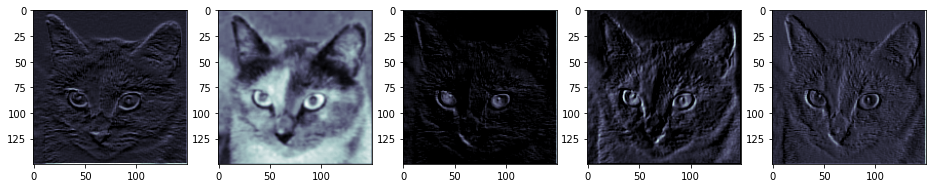

In [22]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,5, figsize=(16, 6))
ax[0].imshow(activations[0][0, :, :, 10], cmap='bone')
ax[1].imshow(activations[0][0, :, :, 25], cmap='bone')
ax[2].imshow(activations[0][0, :, :, 40], cmap='bone')
ax[3].imshow(activations[0][0, :, :, 55], cmap='bone')
ax[4].imshow(activations[0][0, :, :, 63], cmap='bone')

In [23]:
import tensorflow.keras

# These are the names of the layers, so can have them as part of our plot
layer_names = []
for layer in tl_img_aug_finetune_cnn.layers[0].layers[1:9]:
    layer_names.append(layer.name)

images_per_row = 16

# Now let's display our feature maps
for layer_name, layer_activation in zip(layer_names, activations):
    # This is the number of features in the feature map
    n_features = layer_activation.shape[-1]

    # The feature map has shape (1, size, size, n_features)
    size = layer_activation.shape[1]

    # We will tile the activation channels in this matrix
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    # We'll tile each filter into this big horizontal grid
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            # Post-process the feature to make it visually palatable
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image

    # Display the grid
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='bone')

Output hidden; open in https://colab.research.google.com to view.